### Lending Club dataset

#### Exploratory Data Analysis: Transactions by State, prep for Tableau


In [9]:
#Essential imports
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns

#Visualization
import matplotlib.pyplot as plt
%matplotlib inline

#Modeling
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

In [10]:
df = pd.read_csv('./Data/LCdata_cleaning01.csv')
df

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag
0,163477201,5000.0,5000.0,5000.0,36 months,17.74%,180.12,C,C5,Lead Mtc Tech,...,100.0,NaN,0.0,0.0,23453.0,17803.0,0.0,20453.0,N,N
1,164027473,20000.0,20000.0,20000.0,36 months,12.40%,668.12,B,B4,NaN,...,100.0,50.0,1.0,0.0,60800.0,42566.0,5200.0,40000.0,N,N
2,164137439,33000.0,33000.0,33000.0,60 months,15.24%,789.24,C,C2,Financial Analyst,...,100.0,21.4,0.0,0.0,351386.0,80128.0,123800.0,16158.0,N,N
3,162948736,19000.0,19000.0,18975.0,36 months,6.46%,581.99,A,A1,Tech Ops Analyst,...,100.0,40.0,0.0,0.0,184034.0,28461.0,38400.0,35000.0,N,N
4,164131732,15000.0,15000.0,15000.0,36 months,7.02%,463.30,A,A2,Program Manager,...,100.0,0.0,0.0,0.0,404456.0,122865.0,29000.0,152751.0,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376300,163119880,10525.0,10525.0,10525.0,36 months,7.56%,327.69,A,A3,Floor Finisher,...,98.0,0.0,0.0,0.0,70900.0,8774.0,38500.0,15000.0,N,N
376301,163267959,16000.0,16000.0,16000.0,36 months,11.71%,529.22,B,B3,Financial Counselor,...,85.7,0.0,0.0,0.0,22300.0,9359.0,9800.0,8400.0,N,N
376302,163221893,10000.0,10000.0,10000.0,36 months,10.33%,324.23,B,B1,registered dental hygienist,...,80.9,50.0,0.0,0.0,259510.0,40030.0,16300.0,0.0,Y,N
376303,163197179,7500.0,7500.0,7500.0,60 months,8.19%,152.76,A,A4,NaN,...,93.8,0.0,0.0,0.0,25100.0,7862.0,15300.0,0.0,N,N


### A look at the transactions data by State

In [11]:
#Geographical concentration of loans - CA, NY, TX, FL, IL are top 5 states by count (transaction count)
df['addr_state'].value_counts(dropna=False)

CA     51735
TX     32445
FL     28541
NY     28493
IL     14572
NJ     13573
GA     12745
OH     11978
PA     11788
NC     10405
VA     10119
MI      9430
AZ      9273
MA      8982
MD      8858
WA      8105
CO      7056
TN      6431
IN      6177
MN      6120
CT      6061
MO      6049
NV      5568
SC      4955
WI      4848
OR      4803
AL      4207
LA      3956
KY      3662
OK      3479
KS      3016
AR      2936
UT      2590
MS      2362
WV      2248
NM      2009
NH      1862
NE      1829
RI      1748
HI      1673
ID      1437
ME      1282
DE      1081
MT      1049
VT       885
AK       828
ND       802
DC       771
WY       750
SD       729
NaN        4
Name: addr_state, dtype: int64

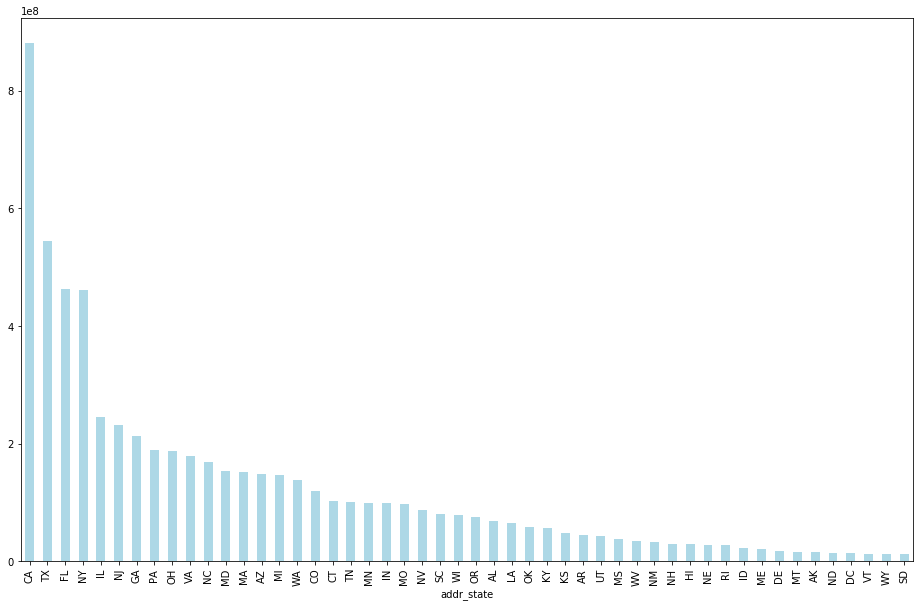

In [27]:
# CA, TX, NY are top 3 states by total amount of transactions
plt.figure(figsize=(16,10))
df.groupby(by='addr_state')['loan_amnt'].sum().sort_values(ascending=False).plot(kind='bar', color='lightblue');

In [13]:
df['addr_state'].value_counts(normalize=True)

CA    0.137483
TX    0.086221
FL    0.075846
NY    0.075719
IL    0.038724
NJ    0.036070
GA    0.033869
OH    0.031831
PA    0.031326
NC    0.027651
VA    0.026891
MI    0.025060
AZ    0.024643
MA    0.023869
MD    0.023540
WA    0.021539
CO    0.018751
TN    0.017090
IN    0.016415
MN    0.016264
CT    0.016107
MO    0.016075
NV    0.014797
SC    0.013168
WI    0.012883
OR    0.012764
AL    0.011180
LA    0.010513
KY    0.009732
OK    0.009245
KS    0.008015
AR    0.007802
UT    0.006883
MS    0.006277
WV    0.005974
NM    0.005339
NH    0.004948
NE    0.004860
RI    0.004645
HI    0.004446
ID    0.003819
ME    0.003407
DE    0.002873
MT    0.002788
VT    0.002352
AK    0.002200
ND    0.002131
DC    0.002049
WY    0.001993
SD    0.001937
Name: addr_state, dtype: float64

In [14]:
# CA, TX, NY are top 3 states by total amount of transactions
df.groupby(by='addr_state')['loan_amnt'].mean().sort_values(ascending=False)

addr_state
AK    18267.995169
VA    17741.068782
HI    17609.757920
DC    17287.191958
MD    17218.178483
NJ    17050.025786
WY    17033.766667
CA    17014.798976
WA    16963.186305
IL    16837.856849
MA    16836.155645
CO    16830.924036
UT    16819.478764
TX    16802.593620
CT    16769.328494
GA    16742.497058
DE    16658.371878
ND    16647.412718
NM    16590.965655
OK    16477.464789
LA    16393.484580
SC    16327.436932
NC    16278.277271
FL    16214.029817
NY    16187.580283
WI    16185.220710
AL    16175.202044
MO    16172.111093
NH    16105.236305
MN    16048.888889
AZ    15983.249757
PA    15968.809382
KS    15925.331565
IN    15895.734175
ME    15807.117785
SD    15796.193416
TN    15744.044472
OR    15682.438060
NV    15680.105065
OH    15675.624061
MS    15637.531753
MT    15623.141087
WV    15608.407473
RI    15589.816934
KY    15533.560896
MI    15528.838812
ID    15484.464161
AR    15341.433924
NE    15295.229634
VT    14636.694915
Name: loan_amnt, dtype: float64

In [15]:
state = df[['addr_state', 'loan_amnt', 'int_rate', 'annual_inc', 'purpose', 'loan_status']] 
state

,addr_state,loan_amnt,int_rate,annual_inc,purpose,loan_status
0,NY,5000.0,17.74%,50000.0,debt_consolidation,Current
1,WA,20000.0,12.40%,13000.0,small_business,Current
2,MI,33000.0,15.24%,84000.0,credit_card,Current
3,OH,19000.0,6.46%,83000.0,debt_consolidation,Current
4,GA,15000.0,7.02%,129000.0,credit_card,Current
...,...,...,...,...,...,...
376300,IL,10525.0,7.56%,40000.0,vacation,Current
376301,AZ,16000.0,11.71%,80000.0,debt_consolidation,Current
376302,MO,10000.0,10.33%,85000.0,credit_card,Current
376303,CA,7500.0,8.19%,30000.0,debt_consolidation,Current


In [16]:
# ## Saving a csv for state data - this is useful for tableau visualization
# state.to_csv('LCdata_byState.csv', index=False)

#### Comparing data by State within the non-current loan status vs all loan status

In [17]:
df_late = df[(df['loan_status']=='Charged Off') | (df['loan_status']=='Late (31-120 days)') | (df['loan_status']=='Late (16-30 days)') | (df['loan_status']=='Default')]
df_late

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag
34,163162710,16000.0,16000.0,16000.0,36 months,6.46%,490.10,A,A1,NaN,...,95.8,16.7,0.0,0.0,186423.0,20332.0,45400.0,17029.0,N,N
90,164166637,15000.0,15000.0,15000.0,60 months,28.80%,474.31,D,D5,Teacher,...,83.3,33.3,0.0,0.0,503980.0,56886.0,21600.0,58580.0,N,N
186,164152164,10000.0,10000.0,10000.0,36 months,8.81%,317.12,A,A5,Framer/Drywall,...,100.0,71.4,0.0,0.0,81902.0,62070.0,12200.0,67102.0,N,N
414,164114717,22100.0,22100.0,22100.0,60 months,13.08%,503.75,B,B5,Professor,...,100.0,0.0,0.0,0.0,279378.0,19209.0,22000.0,28378.0,N,N
429,164008406,12000.0,12000.0,12000.0,36 months,7.02%,370.64,A,A2,NaN,...,100.0,0.0,0.0,0.0,56199.0,13522.0,13500.0,24399.0,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375607,164161732,20000.0,20000.0,20000.0,60 months,20.55%,536.02,D,D2,Mortgage Loan Officer,...,85.7,50.0,0.0,0.0,204750.0,30304.0,7500.0,39596.0,N,N
375654,164196473,4800.0,4800.0,4800.0,36 months,23.05%,185.94,D,D3,sales,...,88.9,66.7,1.0,0.0,137250.0,51160.0,3100.0,53555.0,N,N
375908,164183174,10625.0,10625.0,10625.0,36 months,16.95%,378.55,C,C4,baber,...,100.0,11.1,1.0,0.0,78500.0,39622.0,53600.0,20000.0,N,N
375964,163509515,25000.0,25000.0,25000.0,60 months,20.55%,670.03,D,D2,NaN,...,100.0,25.0,0.0,0.0,102286.0,57977.0,34400.0,67886.0,N,N


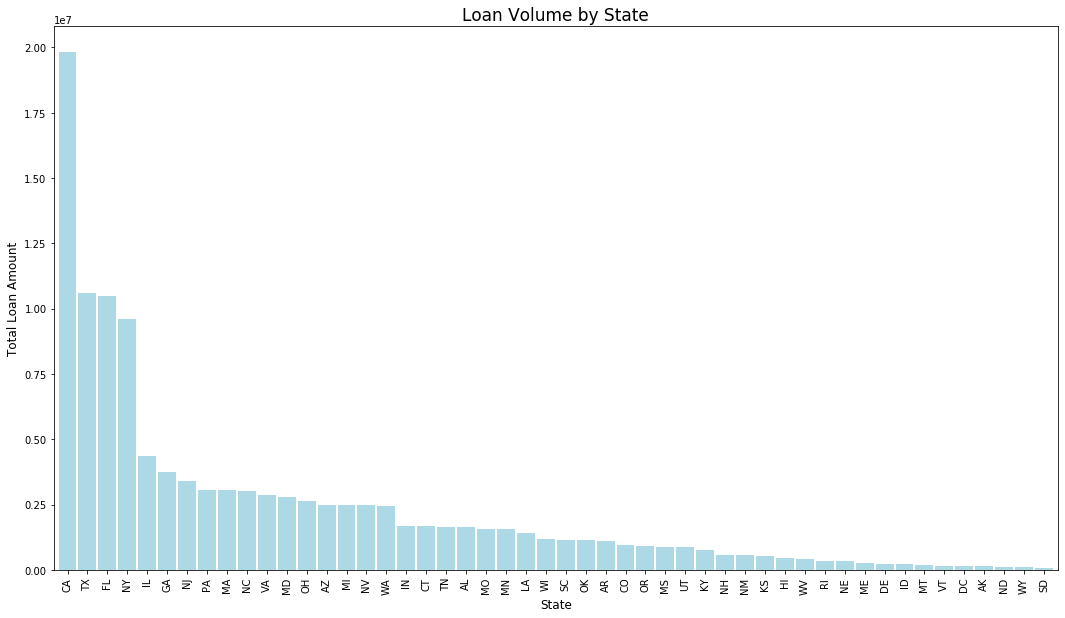

In [18]:
plt.figure(figsize=(18,10))

df_late.groupby(by='addr_state')['loan_amnt'].sum().sort_values(ascending=False).plot(kind='bar', color='lightblue', width=0.9)

plt.title('Loan Volume by State', fontsize=17)
plt.xlabel('State', fontsize=12)
plt.ylabel('Total Loan Amount', fontsize=12)

plt.savefig('VolumebyState.png');

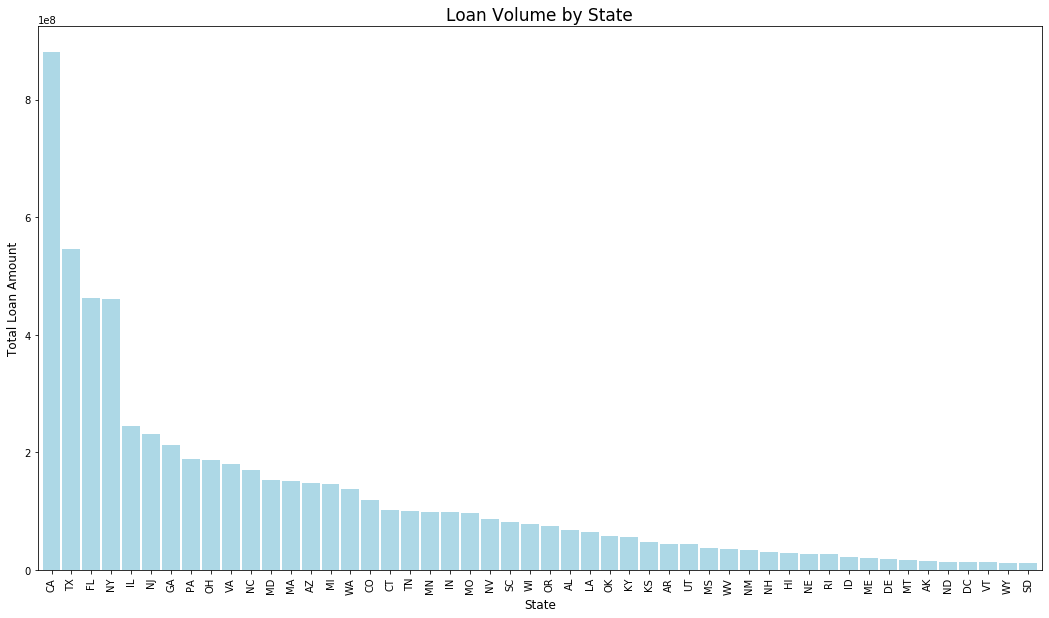

In [19]:
plt.figure(figsize=(18,10))

df.groupby(by='addr_state')['loan_amnt'].sum().sort_values(ascending=False).plot(kind='bar', color='lightblue', width=0.9)

plt.title('Loan Volume by State', fontsize=17)
plt.xlabel('State', fontsize=12)
plt.ylabel('Total Loan Amount', fontsize=12)

plt.savefig('VolumebyState.png');